In [27]:
import requests
import pandas as pd

url = "https://ticdata.treasury.gov/resource-center/data-chart-center/tic/Documents/slt_table5.html"
html = requests.get(url).content

# Read all tables from the HTML content (specift that first row is header)
tables = pd.read_html(html)

In [92]:
# Select the specific DataFrame you want from the list (e.g., the first one)
df = tables[0]

# Drop rows with missing values (NaN) and remove first column
df = df.dropna().reset_index()

#Change first row to header
df.columns = df.iloc[0]
df = df[df.columns[::-1]]
cols = list(df.columns)
cols = [cols[-1]] + cols[:-1]
df = df[cols]
df = df[1:].iloc[:, 1:]

#Graph n largest trent
df_top = df.iloc[0:5]


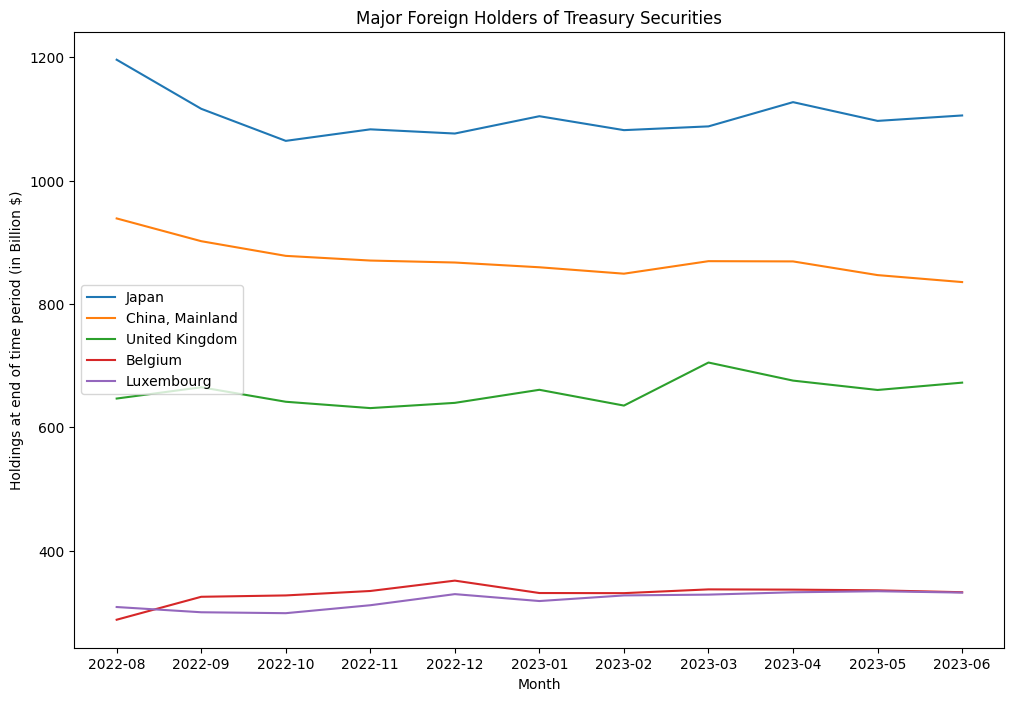

In [93]:
import matplotlib.pyplot as plt

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(12,8))

# Loop through the dictionary and plot each trend
for i in range(5):
    legend = df_top.iloc[i, -1]
    data = pd.to_numeric(df_top.iloc[i, 2:], errors='coerce')
    ax.plot(data, label=legend)

# Set the axis labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Holdings at end of time period (in Billion $)')
ax.set_title('Major Foreign Holders of Treasury Securities')

# Add a legend and display the plot
ax.legend()
plt.show()

Text(0.5, 1.0, 'Saudi Arabia: US Treasury Holdings')

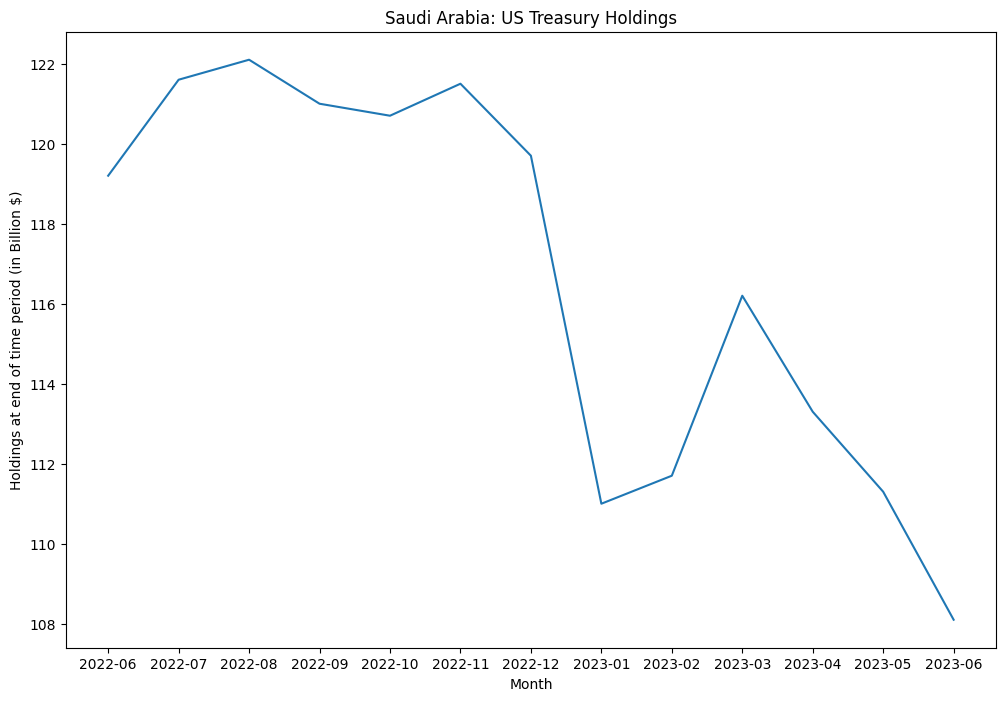

In [94]:
fig1, ax1 = plt.subplots(figsize=(12,8))

country_name = "Saudi Arabia"
df1 = df.loc[df["Country"] == country_name]
df1 = df1.drop(columns=['Country']).astype(float)
df1 = df1.transpose()
ax1.plot(df1)

ax1.set_xlabel('Month')
ax1.set_ylabel('Holdings at end of time period (in Billion $)')
ax1.set_title(f"{country_name}: US Treasury Holdings")

Text(0.5, 1.0, 'China, Mainland: US Treasury Holdings')

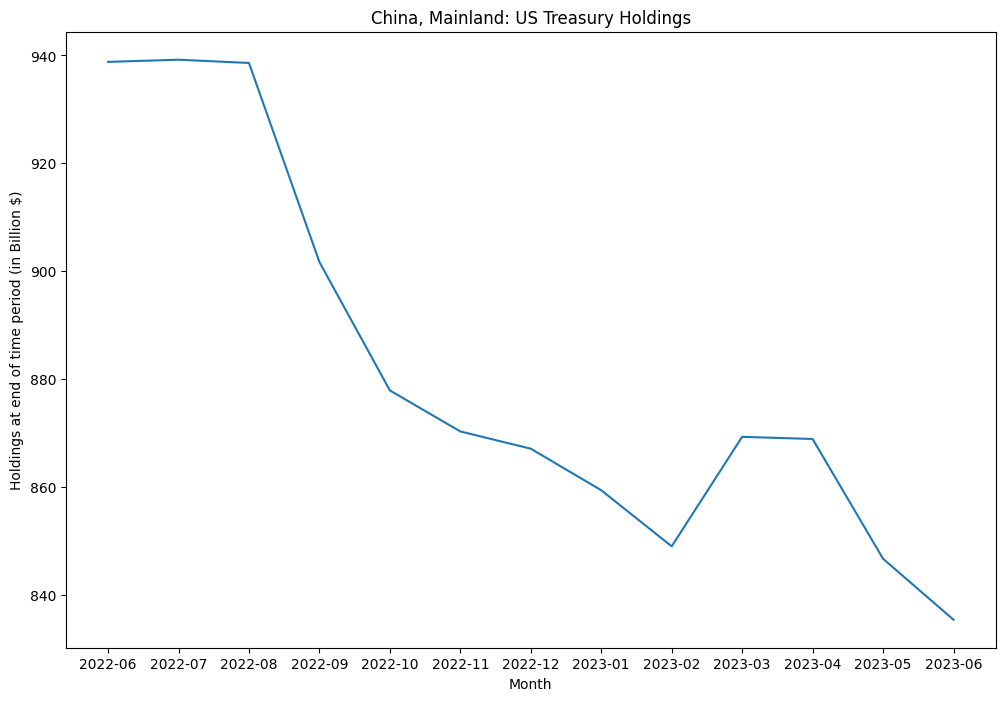

In [95]:
fig2, ax2 = plt.subplots(figsize=(12,8))

country_name = "China, Mainland"
df2 = df.loc[df["Country"] == country_name]
df2 = df2.drop(columns=['Country']).astype(float)
df2 = df2.transpose()
ax2.plot(df2)

ax2.set_xlabel('Month')
ax2.set_ylabel('Holdings at end of time period (in Billion $)')
ax2.set_title(f"{country_name}: US Treasury Holdings")